In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout
from keras.utils import np_utils

Using Theano backend.


# MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
below_5_train = (y_train < 5)
below_5_test = (y_test < 5)

other_5_train = (y_train >= 5)
other_5_test = (y_test >= 5)

In [5]:
X_below_5 = np.concatenate([X_train[below_5_train], X_test[below_5_test]])
y_below_5 = np.concatenate([y_train[below_5_train], y_test[below_5_test]])

X_other_5 = np.concatenate([X_train[other_5_train], X_test[other_5_test]])
y_other_5 = np.concatenate([y_train[other_5_train], y_test[other_5_test]])

X_below_5.shape, y_below_5.shape, X_other_5.shape, y_other_5.shape

((35735, 28, 28), (35735,), (34265, 28, 28), (34265,))

In [6]:
print(below_5_test.sum() + below_5_train.sum(),
      other_5_test.sum() + other_5_train.sum()
     )

35735 34265


In [7]:
X_below_5 = X_below_5.reshape((-1,28,28,1)) / 255
X_other_5 = X_other_5.reshape((-1,28,28,1)) / 255

In [8]:
y_below_5 = np_utils.to_categorical(y_below_5)
y_other_5 = np_utils.to_categorical(y_other_5)
print(y_below_5.shape, y_other_5.shape)

(35735, 5) (34265, 10)


In [9]:
split_below_5 = int(0.8 * X_below_5.shape[0])
split_other_5 = int(0.8 * X_other_5.shape[0])

X_train_below_5 = X_below_5[:split_below_5]
y_train_below_5 = y_below_5[:split_below_5]

X_test_below_5 = X_below_5[split_below_5:]
y_test_below_5 = y_below_5[split_below_5:]


X_train_other_5 = X_other_5[:split_other_5]
y_train_other_5 = y_other_5[:split_other_5]

X_test_other_5 = X_other_5[split_other_5:]
y_test_other_5 = y_other_5[split_other_5:]

print(X_train_below_5.shape, y_train_below_5.shape)
print(X_train_other_5.shape, y_train_other_5.shape)

(28588, 28, 28, 1) (28588, 5)
(27412, 28, 28, 1) (27412, 10)


In [10]:
model_below_5 = Sequential()

model_below_5.add(Conv2D(8, 5, input_shape=(28, 28, 1), activation='relu'))
model_below_5.add(Conv2D(16, 5, activation='relu'))
model_below_5.add(MaxPool2D(pool_size=(2, 2)))
model_below_5.add(Conv2D(32, 3, activation='relu'))
model_below_5.add(Flatten())
model_below_5.add(Dropout(0.4))

model_below_5.add(Dense(128))
model_below_5.add(Activation('relu'))

model_below_5.add(Dense(5))
model_below_5.add(Activation('softmax'))

model_below_5.summary()
model_below_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272    
__________

In [11]:
t0 = time.time()
hist_below_5 = model_below_5.fit(X_train_below_5, y_train_below_5,
                         epochs=5,
                         shuffle=True,
                         batch_size=100,
                         validation_data=(X_test_below_5, y_test_below_5),
                    )

print("Time Taken: ", time.time() - t0)

Train on 28588 samples, validate on 7147 samples
Epoch 1/5
28588/28588 [==============================] - 25s 883us/step - loss: 0.1362 - acc: 0.9594 - val_loss: 0.0247 - val_acc: 0.9930
Epoch 2/5
28588/28588 [==============================] - 25s 875us/step - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0125 - val_acc: 0.9968
Epoch 3/5
28588/28588 [==============================] - 26s 916us/step - loss: 0.0206 - acc: 0.9934 - val_loss: 0.0081 - val_acc: 0.9989
Epoch 4/5
28588/28588 [==============================] - 25s 860us/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0095 - val_acc: 0.9968
Epoch 5/5
28588/28588 [==============================] - 25s 861us/step - loss: 0.0109 - acc: 0.9963 - val_loss: 0.0066 - val_acc: 0.9982
Time Taken:  131.42366218566895


In [12]:
for l in model_below_5.layers[:6]:
    l.trainable = False
    
for l in model_below_5.layers:
    print (l.trainable)

False
False
False
False
False
False
True
True
True
True


In [13]:
model_other_5 = Sequential(model_below_5.layers[:6])

model_other_5.add(Dense(128))
model_other_5.add(Activation('relu'))
model_other_5.add(Dense(10))
model_other_5.add(Activation('softmax'))

model_other_5.summary()
model_other_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               262272    
__________

In [14]:
t0 = time.time()
hist_other_5 = model_other_5.fit(X_train_other_5, y_train_other_5,
                         epochs=5,
                         shuffle=True,
                         batch_size=100,
                         validation_data=(X_test_other_5, y_test_other_5),
                    )

print("Time Taken: ", time.time() - t0)

Train on 27412 samples, validate on 6853 samples
Epoch 1/5
27412/27412 [==============================] - 12s 435us/step - loss: 0.1087 - acc: 0.9679 - val_loss: 0.0351 - val_acc: 0.9892
Epoch 2/5
27412/27412 [==============================] - 12s 421us/step - loss: 0.0429 - acc: 0.9864 - val_loss: 0.0312 - val_acc: 0.9902
Epoch 3/5
27412/27412 [==============================] - 11s 388us/step - loss: 0.0330 - acc: 0.9894 - val_loss: 0.0276 - val_acc: 0.9911
Epoch 4/5
27412/27412 [==============================] - 12s 431us/step - loss: 0.0292 - acc: 0.9909 - val_loss: 0.0232 - val_acc: 0.9930
Epoch 5/5
27412/27412 [==============================] - 12s 436us/step - loss: 0.0267 - acc: 0.9912 - val_loss: 0.0272 - val_acc: 0.9918
Time Taken:  58.95063495635986


# CIFAR-10

In [70]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [71]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [72]:
below_5_train = (y_train < 5).flatten()
below_5_test = (y_test < 5).flatten()

other_5_train = (y_train >= 5).flatten()
other_5_test = (y_test >= 5).flatten()

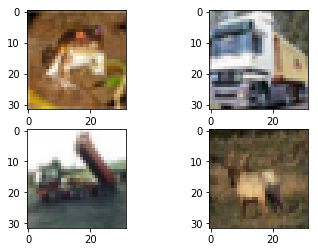

In [73]:
plt.figure(0)

plt.subplot(2, 2, 1)
plt.imshow(X_train[0])

plt.subplot(2, 2, 2)
plt.imshow(X_train[1])

plt.subplot(2, 2, 3)
plt.imshow(X_train[2])

plt.subplot(2, 2, 4)
plt.imshow(X_train[3])

plt.show()

In [74]:
X_below_5 = np.concatenate([X_train[below_5_train], X_test[below_5_test]])
y_below_5 = np.concatenate([y_train[below_5_train], y_test[below_5_test]])

X_other_5 = np.concatenate([X_train[other_5_train], X_test[other_5_test]])
y_other_5 = np.concatenate([y_train[other_5_train], y_test[other_5_test]])

X_below_5.shape, y_below_5.shape, X_other_5.shape, y_other_5.shape

((30000, 32, 32, 3), (30000, 1), (30000, 32, 32, 3), (30000, 1))

In [75]:
print(below_5_test.sum() + below_5_train.sum(),
      other_5_test.sum() + other_5_train.sum()
     )

30000 30000


In [76]:
X_below_5 = X_below_5.reshape((-1,32,32,3))
X_other_5 = X_other_5.reshape((-1,32,32,3))

In [77]:
y_other_5 = y_other_5 - 5 # To reduce the 5-9 to 0-4 (for num_classes to be 5 rather than 10)

In [78]:
y_below_5 = np_utils.to_categorical(y_below_5)
y_other_5 = np_utils.to_categorical(y_other_5)
print(y_below_5.shape, y_other_5.shape)

(30000, 5) (30000, 5)


In [79]:
split_below_5 = int(0.8 * X_below_5.shape[0])
split_other_5 = int(0.8 * X_other_5.shape[0])

X_train_below_5 = X_below_5[:split_below_5]
y_train_below_5 = y_below_5[:split_below_5]

X_test_below_5 = X_below_5[split_below_5:]
y_test_below_5 = y_below_5[split_below_5:]


X_train_other_5 = X_other_5[:split_other_5]
y_train_other_5 = y_other_5[:split_other_5]

X_test_other_5 = X_other_5[split_other_5:]
y_test_other_5 = y_other_5[split_other_5:]

print(X_train_below_5.shape, y_train_below_5.shape)
print(X_train_other_5.shape, y_train_other_5.shape)

(24000, 32, 32, 3) (24000, 5)
(24000, 32, 32, 3) (24000, 5)


In [80]:
model_below_5 = Sequential()

model_below_5.add(Conv2D(8, 5, input_shape=(32, 32, 3), activation='relu'))
model_below_5.add(Conv2D(16, 5, activation='relu'))
model_below_5.add(MaxPool2D(pool_size=(2, 2)))
model_below_5.add(Conv2D(32, 3, activation='relu'))
model_below_5.add(Flatten())
model_below_5.add(Dropout(0.4))

model_below_5.add(Dense(128))
model_below_5.add(Activation('relu'))

model_below_5.add(Dense(5))
model_below_5.add(Activation('softmax'))

model_below_5.summary()
model_below_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         608       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               409728    
__________

In [81]:
t0 = time.time()
hist_below_5 = model_below_5.fit(X_train_below_5, y_train_below_5,
                         epochs=5,
                         shuffle=True,
                         batch_size=100,
                         validation_data=(X_test_below_5, y_test_below_5),
                    )

print("Time Taken: ", time.time() - t0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/5
24000/24000 [==============================] - 31s 1ms/step - loss: 2.0530 - acc: 0.4247 - val_loss: 1.1014 - val_acc: 0.5392
Epoch 2/5
24000/24000 [==============================] - 30s 1ms/step - loss: 1.0356 - acc: 0.5793 - val_loss: 0.9996 - val_acc: 0.5975
Epoch 3/5
24000/24000 [==============================] - 32s 1ms/step - loss: 0.9205 - acc: 0.6342 - val_loss: 0.9025 - val_acc: 0.6472
Epoch 4/5
24000/24000 [==============================] - 31s 1ms/step - loss: 0.8408 - acc: 0.6676 - val_loss: 0.8835 - val_acc: 0.6550
Epoch 5/5
24000/24000 [==============================] - 31s 1ms/step - loss: 0.7829 - acc: 0.6953 - val_loss: 0.8699 - val_acc: 0.6653
Time Taken:  156.52614402770996


In [82]:
for l in model_below_5.layers[:6]:
    l.trainable = False
    
for l in model_below_5.layers:
    print (l.trainable)

False
False
False
False
False
False
True
True
True
True


In [83]:
model_other_5 = Sequential(model_below_5.layers[:6])

model_other_5.add(Dense(128))
model_other_5.add(Activation('relu'))
model_other_5.add(Dense(5))
model_other_5.add(Activation('softmax'))

model_other_5.summary()
model_other_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         608       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3200)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               409728    
__________

In [84]:
t0 = time.time()
hist_other_5 = model_other_5.fit(X_train_other_5, y_train_other_5,
                         epochs=5,
                         shuffle=True,
                         batch_size=100,
                         validation_data=(X_test_other_5, y_test_other_5),
                    )

print("Time Taken: ", time.time() - t0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/5
24000/24000 [==============================] - 13s 557us/step - loss: 0.9598 - acc: 0.6269 - val_loss: 0.8225 - val_acc: 0.6828
Epoch 2/5
24000/24000 [==============================] - 15s 631us/step - loss: 0.7366 - acc: 0.7180 - val_loss: 0.7724 - val_acc: 0.7030
Epoch 3/5
24000/24000 [==============================] - 14s 572us/step - loss: 0.6413 - acc: 0.7561 - val_loss: 0.7607 - val_acc: 0.7078
Epoch 4/5
24000/24000 [==============================] - 15s 607us/step - loss: 0.5475 - acc: 0.7934 - val_loss: 0.7643 - val_acc: 0.7165
Epoch 5/5
24000/24000 [==============================] - 15s 619us/step - loss: 0.4763 - acc: 0.8201 - val_loss: 0.7720 - val_acc: 0.7172
Time Taken:  72.68003392219543
